## Perkenalan
Nama: Sivi Almanaf Ali Shahab

Batch: 006

## 1. Linear Regression

### Objective

**Can you accurately predict insurance costs?**

### Problem Statement
Memprediksi biaya premi asuransi yang harus dibayarkan oleh nasabah dengan data yang diberikan

**Context**

Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

**Content**

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

#### *Download Dataset*
Before starting, you need to have the opendatasets library installed in your system.

In [1]:
!pip install opendatasets --q

In [2]:
import opendatasets as od

The dataset can now be downloaded using od.download. When you execute od.download, you will be asked to provide your Kaggle username and API key. Follow these instructions to create an API key: http://bit.ly/kaggle-creds

In [3]:
dataset_url = 'https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv'

In [4]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Your Kaggle Key: Downloading insurance.zip to .\insurance


100%|██████████| 16.0k/16.0k [00:00<00:00, 5.47MB/s]

### *Import Library*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing
%matplotlib inline

### *Data Loading*

In [2]:
data = pd.read_csv('./insurance/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### *Explorasi Data*


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Dari informasi diatas dapat diperoleh kesimpulan bahwa data tidak ada yang missing value dan tipe data sudah sesuai

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='charges', ylabel='Count'>

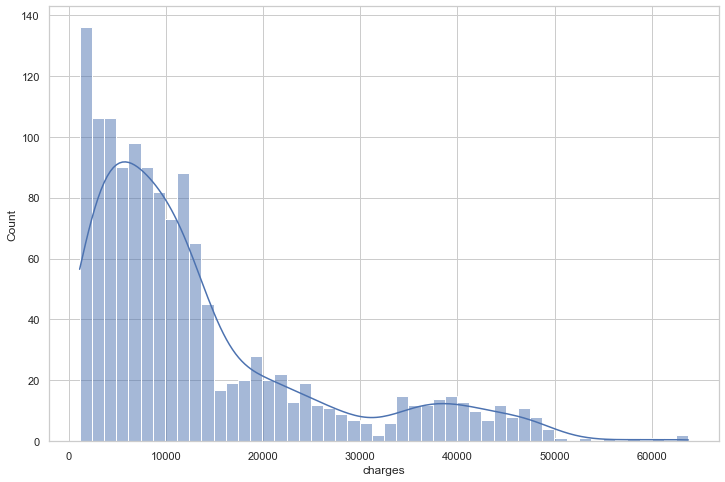

In [6]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=data, x="charges", bins=50, kde=True)

In [7]:
data_smoker = data.groupby(['smoker']).count()
data_smoker

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


<AxesSubplot:title={'center':'Jumlah Data Age'}>

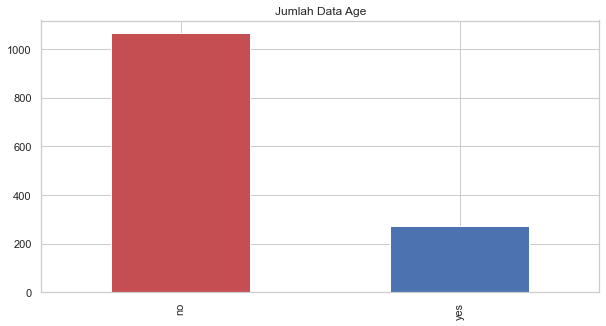

In [8]:
data_smoker_non_smoker = data['smoker'].value_counts()

data_smoker_non_smoker.plot(kind='bar', color=['r', 'b'], figsize=[10, 5], title='Jumlah Data Age')

Jumlah data Non Smoker dan Smoker Inbalanced

<AxesSubplot:title={'center':'Age vs Charges'}, xlabel='age', ylabel='charges'>

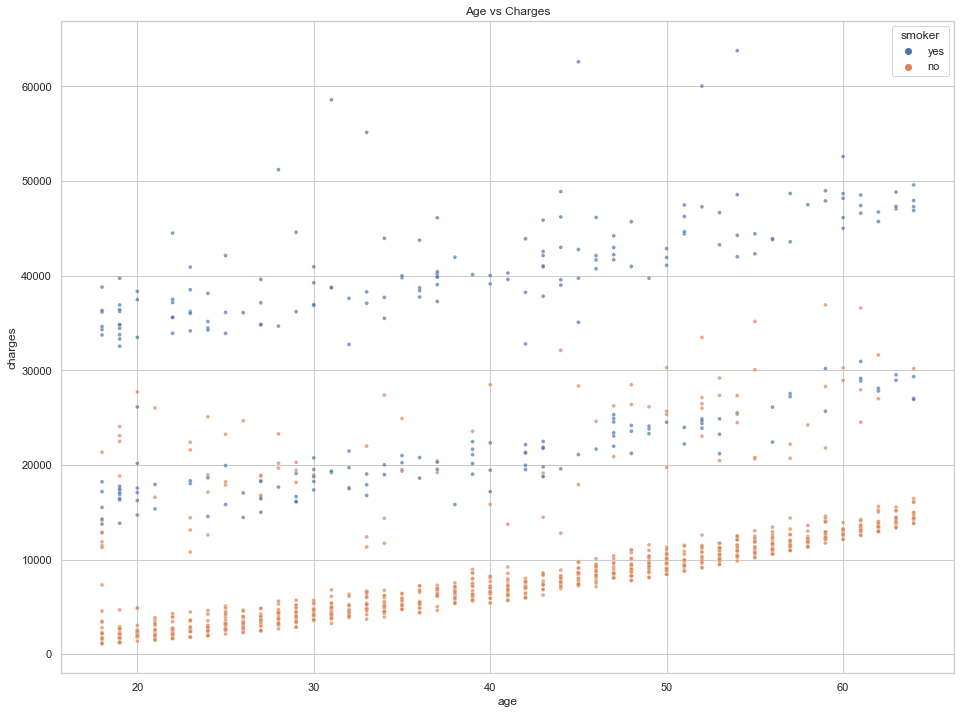

In [9]:
plt.figure(figsize=(16, 12))
plt.title('Age vs Charges')
sns.scatterplot(data=data, x='age', y='charges', hue='smoker', alpha=0.7, s=15)

Dari grafik diatas perokok dan usia yang bertambah cenderung memiliki charges yang lebih tinggi daripada yang bukan perokok

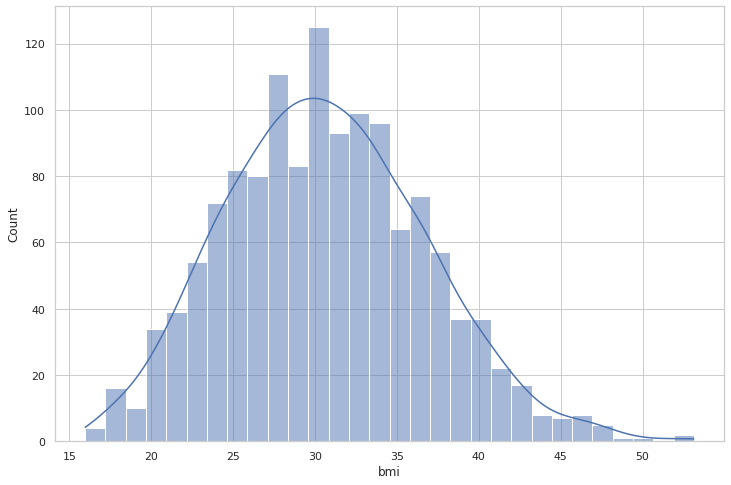

In [10]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=data, x="bmi", bins=30, kde=True)

Untuk feature BMI terlihat seperti berdistribusi normal

<AxesSubplot:title={'center':'BMI vs Charges'}, xlabel='bmi', ylabel='charges'>

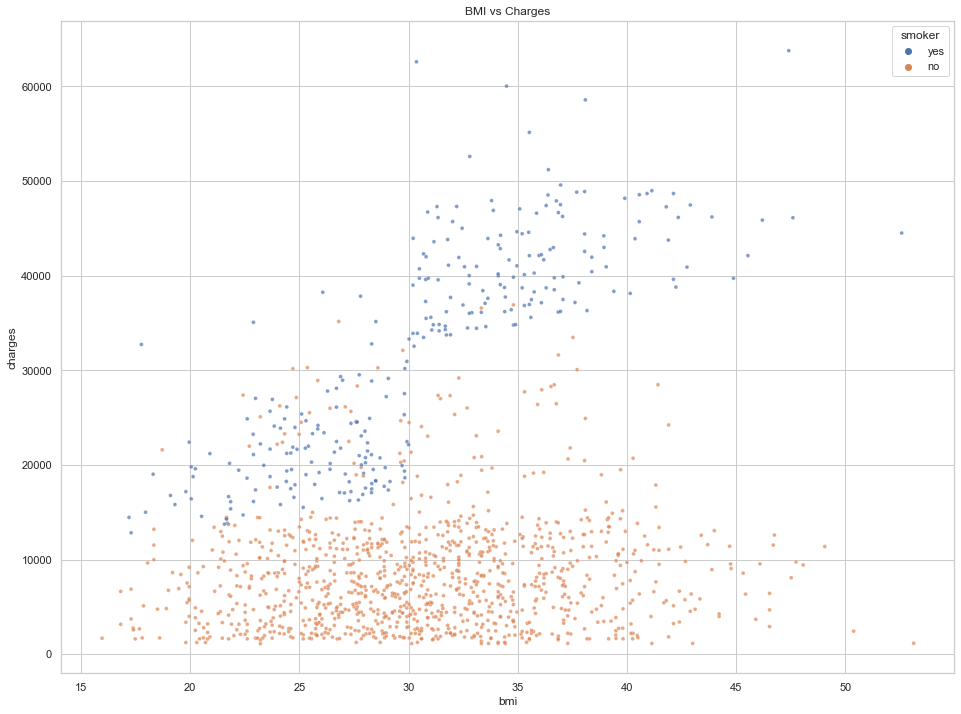

In [10]:
plt.figure(figsize=(16, 12))
plt.title('BMI vs Charges')
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker', alpha=0.7, s=15)

Tampaknya untuk non-perokok peningkatan BMI tidaak terkait dengan peningkatan charges, sedangkan untuk perokok charges akan meningkat ketika BMI lebih besar dari 30

###### Correlation

kita akan mencari nilai korelasi variable predictor terhadap variable target nya

In [11]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = data.smoker.map(smoker_values)

In [12]:
data.charges.corr(smoker_numeric)

0.787251430498477

Text(0.5, 1.0, 'correlation Matrix')

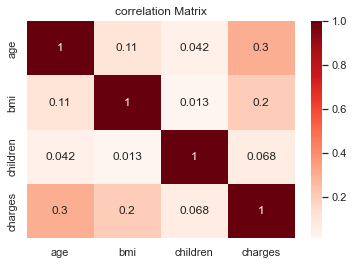

In [13]:
sns.heatmap(data.corr(), cmap='Reds', annot=True)
plt.title('correlation Matrix')

#### *Data Preprocessing*

In [14]:
df = data.copy()
smoker_values = {'no': 0, 'yes': 1}
df['smoker_values'] = df.smoker.map(smoker_values)

In [15]:
sex_values = {'female': 0, 'male': 1}
df['sex_values'] = df.sex.map(sex_values)

In [16]:
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [17]:
one_hot = enc.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [18]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_values,sex_values,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [20]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [30]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs.shape

(1338, 3)

#### *Pendefinisian Model*

In [22]:
categoric_cols = ['smoker_values', 'sex_values',	'northeast', 'northwest', 'southeast', 'southwest']
categoric_data = df[categoric_cols].values

In [29]:
categoric_data.shape

(1338, 6)

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_values,sex_values,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [23]:
X = np.concatenate((scaled_inputs, categoric_data), axis=1)
y = df.charges

In [28]:
X.shape

(1338, 9)

In [32]:
X_data = pd.DataFrame(data=X, columns=['age', 'bmi', 'children', 'smoker_values', 'sex_values',	'northeast', 'northwest', 'southeast', 'southwest'])
X_data.head()

,age,bmi,children,smoker_values,sex_values,northeast,northwest,southeast,southwest
0,-1.438764,-0.453320,-0.908614,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,0.0,1.0,0.0,1.0,0.0,0.0


In [27]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Kita akan membagi dataset training sebanyak 70% dan dataset testing sebanyak 30%

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3, random_state=42)

In [36]:
model = LinearRegression()

#### *Pelatihan Model*

Kita akan menggunakan model Regresi linear untuk memprediksi premi asuransi yang harus dibayarkan

In [37]:
model.fit(X_train, y_train)

LinearRegression()

#### *Evaluasi Model*

In [38]:
#predicting r2 score from training data
y_pred_linear_train = model.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)


#predicting r2 score from test data
y_pred_linear_test = model.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

rmse_linear_test = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear_test)

R2_score (train):  0.742398009060026
R2_score (test):  0.769611805436901
RMSE:  5812.100272258872


#### *Model Inference*

In [43]:
X_data.head()

,age,bmi,children,smoker_values,sex_values,northeast,northwest,southeast,southwest
0,-1.438764,-0.453320,-0.908614,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,0.0,1.0,0.0,1.0,0.0,0.0


In [48]:
data = [[-1.438764,	-0.453320, -0.908614, 1.0, 0.0, 0.0, 0.0, 0.0,	1.0]]
X_pred = pd.DataFrame(data, index=[1], columns=X_data.columns)
X_pred

,age,bmi,children,smoker_values,sex_values,northeast,northwest,southeast,southwest
1,-1.438764,-0.45332,-0.908614,1.0,0.0,0.0,0.0,0.0,1.0


In [49]:
model.predict(X_pred)

array([25027.22569134])

#### Pengambilan Kesimpulan



Untuk Kasus Premi Asuransi dengan menggunakan Regression Linier di peroleh model 

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

dengan menggunakan semua fitur kia dapat memprediksi premi asuransi dengan akurasi test 77%

## 2. Logistic Regression

## Perkenalan

### Objective: prediksi jenis galaksi

0: galaksi elips, 1: galaksi spiral


**Context**

Machine Learning applied to Galaxy Morphology

**Content**

Machine and Deep Learning morphological classification for 670,560 galaxies from Sloan Digital Sky Survey Data Release 7 (SDSS-DR7). Classifications are provided for 2 classes problem (0: elliptical; or, 1: spiral galaxy) and 3 classes problem (0: elliptical, 1: non-barred spiral, or 2: barred spiral galaxy). ML2classes classification is obtained by Traditional Machine Learning Approach, using Morphological non-parametric parameters and Decision Tree. Classifications using Deep Learning are obtained using a Convolutional Neural Network (CNN). Morphological non-parametric parameters are provided as well: Concentration (C), Asymmetry (A), Smoothness (S), Gradient Pattern Analysis (G2) parameter and Entropy (H). We also provide the Error from CyMorph processing. All error flags are mapped as follows: Error = 0: success (no errors); Error = 1: many objects of significant brightness inside 2 Rp of the galaxy; Error = 2: not possible to calculate the galaxy's Rp; Error = 3: problem calculating GPA; Error = 4: problem calculating H; Error = 5: problem calculating C; Error = 6: problem calculating A; Error = 7: problem calculating S.

**Acknowledgements**

Barchi, Paulo; de Sá Freitas, Camila; Gonçalves, Thiago S.; Moura, Tatiana; Rosa, Reinaldo; Sautter, Rubens; Clua, Esteban; Marques, Bruno; de Carvalho, Reinaldo; Soares-Santos, Marcelle (2019), “Catalog for: Machine and Deep Learning Applied to Galaxy Morphology - A Comparative Study”, Mendeley Data, V1,
doi: 10.17632/tg7c985c2n.1


#### Import pustaka yang dibutuhkan

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#### Load data

In [55]:
DATA_URL = 'https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/GalaxyMorphology.csv'


def load_data():
    dataframe = pd.read_csv(DATA_URL)
    lowercase = lambda x: str(x).lower()
    dataframe.rename(lowercase, axis='columns', inplace=True)
    dataframe.drop(['unnamed: 0'], axis=1, inplace=True)
    return dataframe

In [56]:
data2 = load_data()

In [57]:
data2.head()

,ttype,k,c,a,s,g2,h,cnn2classes1stclass
0,1.854829,6.560199,0.357051,0.932151,0.850992,1.588183,0.697214,1
1,4.815538,25.950829,0.313292,0.610999,0.723122,1.533653,0.719412,1
2,0.678056,6.867416,0.408286,0.881524,0.813231,1.743747,0.750872,1
3,-0.547708,11.877941,-9999.999999,0.838779,0.816965,1.672529,0.771995,1
4,2.028543,20.458965,0.446453,0.839216,0.801140,1.107665,0.610453,1


In [58]:
df2 = data2.copy()

In [59]:
df2 = data2.loc[:, ['c', 'a', 's', 'g2', 'h', 'cnn2classes1stclass']]
df2.head()

,c,a,s,g2,h,cnn2classes1stclass
0,0.357051,0.932151,0.850992,1.588183,0.697214,1
1,0.313292,0.610999,0.723122,1.533653,0.719412,1
2,0.408286,0.881524,0.813231,1.743747,0.750872,1
3,-9999.999999,0.838779,0.816965,1.672529,0.771995,1
4,0.446453,0.839216,0.801140,1.107665,0.610453,1


In [61]:
df2['cnn2classes1stclass'].unique()

array([1, 0], dtype=int64)

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   c                    20000 non-null  float64
 1   a                    20000 non-null  float64
 2   s                    20000 non-null  float64
 3   g2                   20000 non-null  float64
 4   h                    20000 non-null  float64
 5   cnn2classes1stclass  20000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 937.6 KB


#### Data Cleaning

In [70]:
df2.isnull().sum()

c                      0
a                      0
s                      0
g2                     0
h                      0
cnn2classes1stclass    0
dtype: int64

In [101]:
imputer = SimpleImputer(missing_values=-9999.999999, strategy='mean')

In [102]:
X_log = df2.iloc[:, 0:-1]
y_log = df2.iloc[:, -1]

In [103]:
X_log_imputer = imputer.fit_transform(X_log)

In [104]:
X_log_data = pd.DataFrame(data=X_log_imputer, columns=X_log.columns)
X_log_data

,c,a,s,g2,h
0,0.357051,0.932151,0.850992,1.588183,0.697214
1,0.313292,0.610999,0.723122,1.533653,0.719412
2,0.408286,0.881524,0.813231,1.743747,0.750872
3,0.398460,0.838779,0.816965,1.672529,0.771995
4,0.446453,0.839216,0.801140,1.107665,0.610453
...,...,...,...,...,...
19995,0.358020,0.602471,0.832848,1.611594,0.735315
19996,0.470026,0.842624,0.868289,1.313089,0.649996
19997,0.323334,0.830340,0.950820,1.406042,0.671217
19998,0.393574,0.632766,0.825990,1.659363,0.379448


#### Explorasi Data

Concentration (C)

Asymmetry (A)

Smoothness (S)

Gradient Pattern Analysis (G2)

parameter and Entropy (H)

Classifications are provided for 2 classes problem (0: elliptical; or, 1: spiral galaxy)

In [105]:
df2_new = pd.concat([X_log_data, y_log], axis=1)
df2_new 

,c,a,s,g2,h,cnn2classes1stclass
0,0.357051,0.932151,0.850992,1.588183,0.697214,1
1,0.313292,0.610999,0.723122,1.533653,0.719412,1
2,0.408286,0.881524,0.813231,1.743747,0.750872,1
3,0.398460,0.838779,0.816965,1.672529,0.771995,1
4,0.446453,0.839216,0.801140,1.107665,0.610453,1
...,...,...,...,...,...,...
19995,0.358020,0.602471,0.832848,1.611594,0.735315,1
19996,0.470026,0.842624,0.868289,1.313089,0.649996,1
19997,0.323334,0.830340,0.950820,1.406042,0.671217,1
19998,0.393574,0.632766,0.825990,1.659363,0.379448,1


Text(0.5, 1.0, 'Concentration vs Smoothness ')

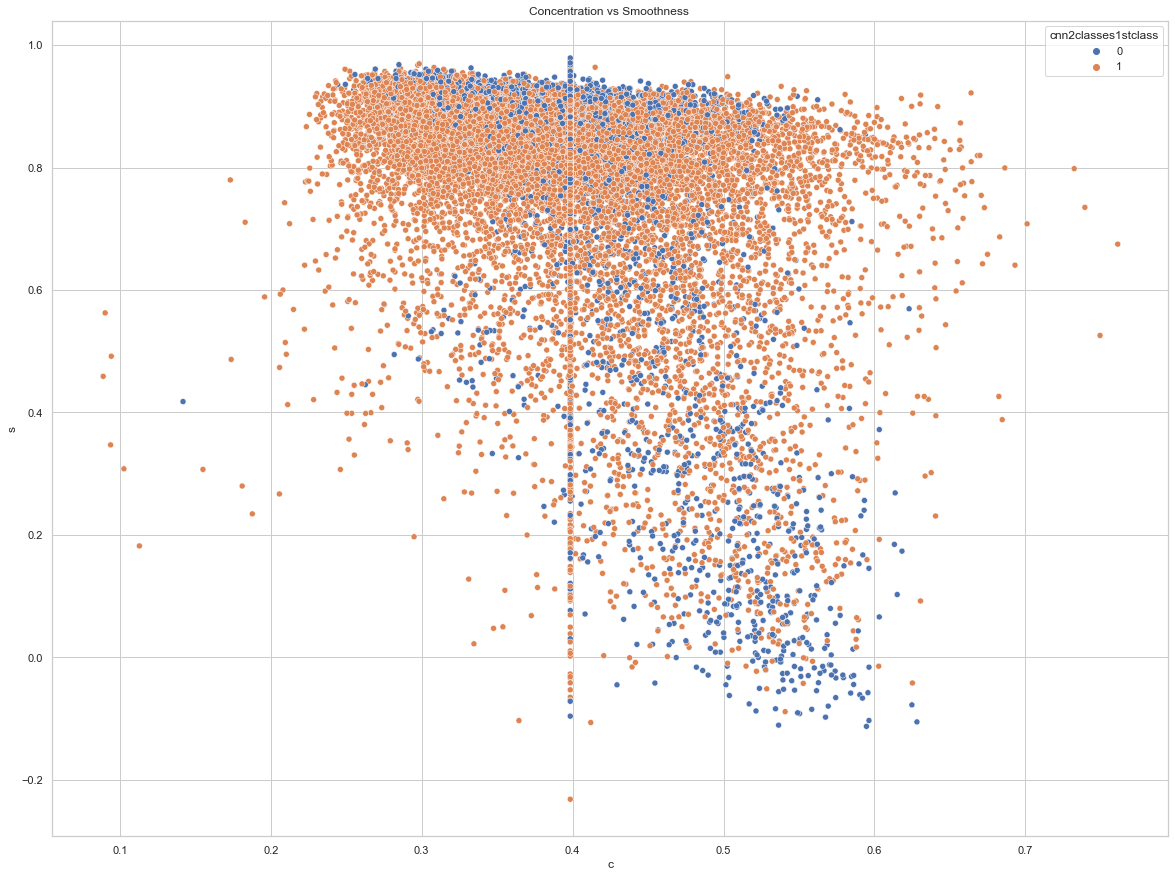

In [106]:
plt.figure(figsize = (20, 15))
sns.scatterplot(data=df2_new, x="c", y="s", hue="cnn2classes1stclass")
plt.title("Concentration vs Smoothness ")

Text(0.5, 1.0, 'Asymmetry vs Gradient Pattern Analysis')

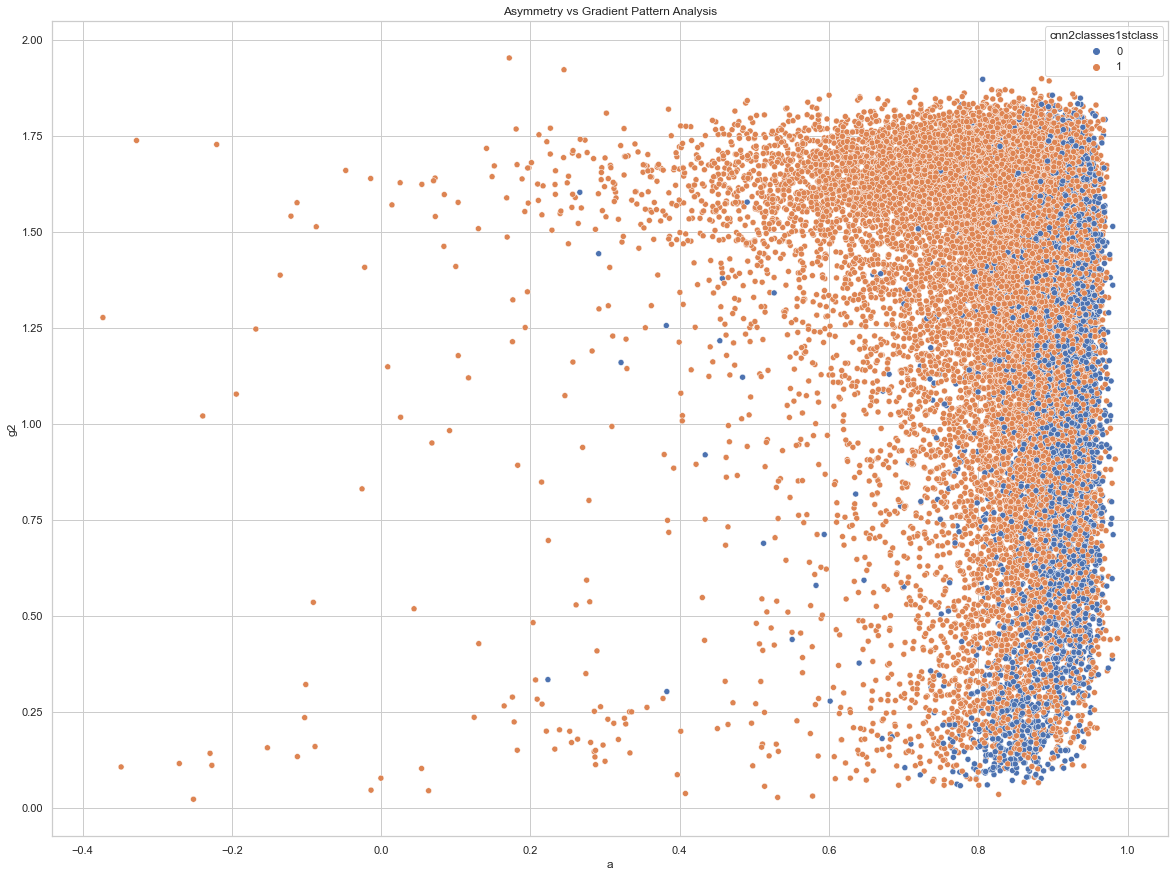

In [107]:
plt.figure(figsize = (20, 15))
sns.scatterplot(data=df2_new, x="a", y="g2", hue="cnn2classes1stclass")
plt.title("Asymmetry vs Gradient Pattern Analysis")

Text(0.5, 1.0, 'Concentration parameter and Entropy')

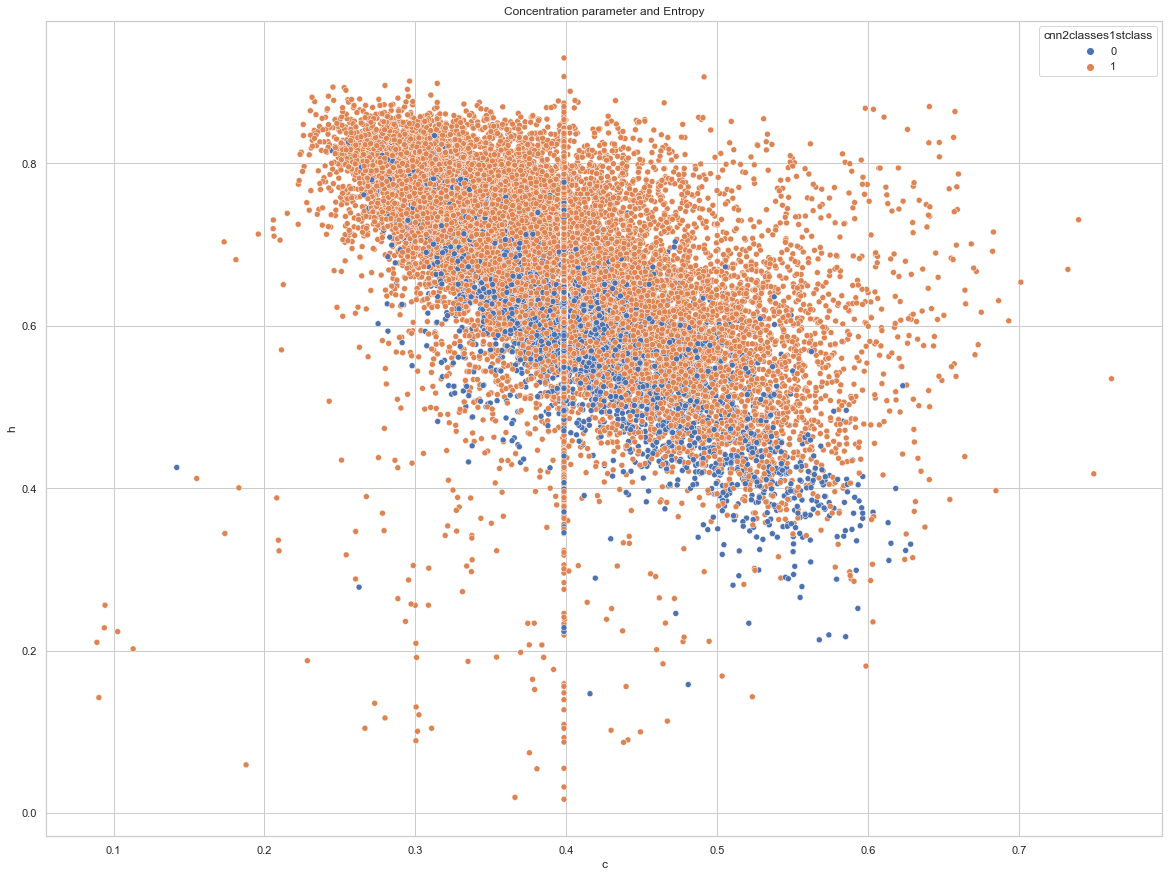

In [108]:
plt.figure(figsize = (20, 15))
sns.scatterplot(data=df2_new, x="c", y="h", hue="cnn2classes1stclass")
plt.title("Concentration parameter and Entropy")

Text(0.5, 1.0, 'Classifications are provided for 2 classes problem (0: elliptical; or, 1: spiral galaxy)')

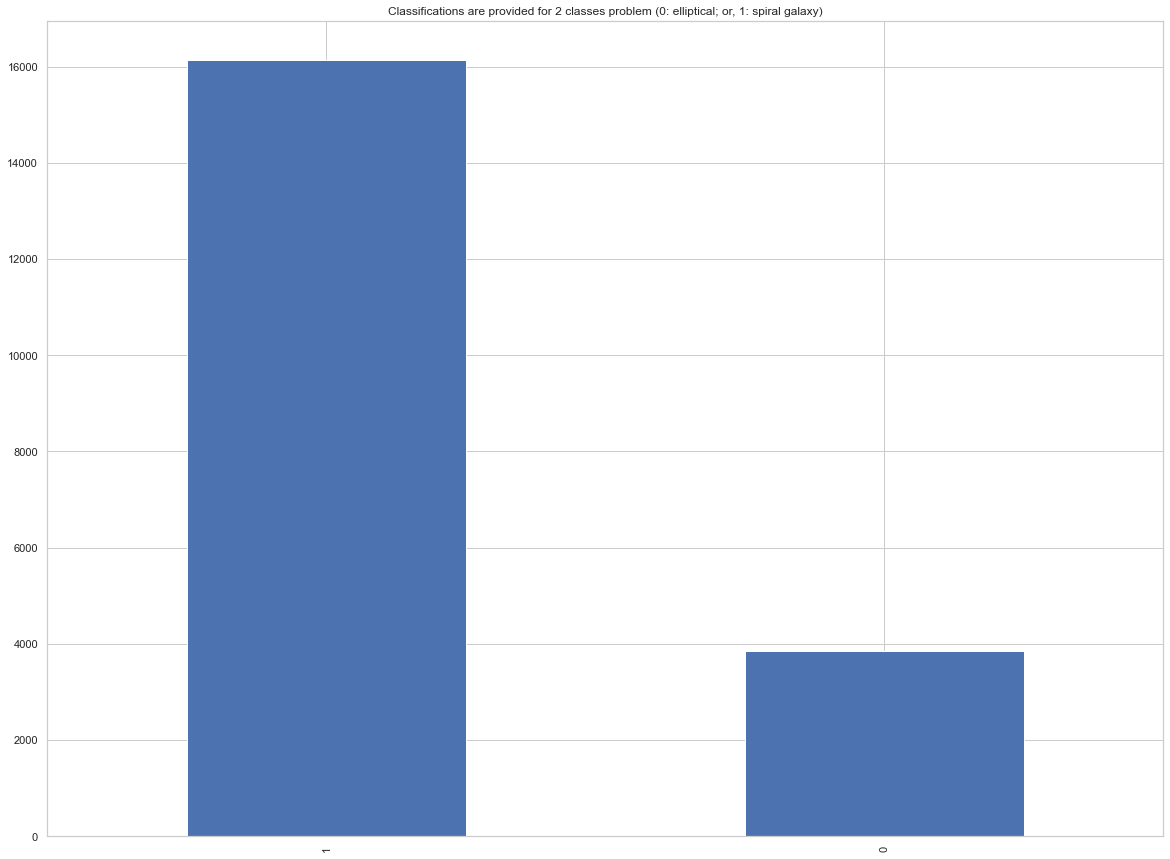

In [109]:
plt.figure(figsize = (20, 15))
df2_new['cnn2classes1stclass'].value_counts().plot(kind='bar')
plt.title('Classifications are provided for 2 classes problem (0: elliptical; or, 1: spiral galaxy)')

In [110]:
df2_new.describe()

,c,a,s,g2,h,cnn2classes1stclass
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.398460,0.824033,0.779752,1.247193,0.655137,0.807200
std,0.073188,0.124436,0.184007,0.438583,0.113237,0.394507
min,0.089012,-0.372718,-0.231944,0.022276,0.017008,0.000000
25%,0.348326,0.782725,0.757836,0.980303,0.585356,1.000000
50%,0.398460,0.859172,0.844121,1.364905,0.659603,1.000000
75%,0.437227,0.905404,0.889421,1.606039,0.743029,1.000000
max,0.761184,0.986535,0.979032,1.953389,0.929947,1.000000


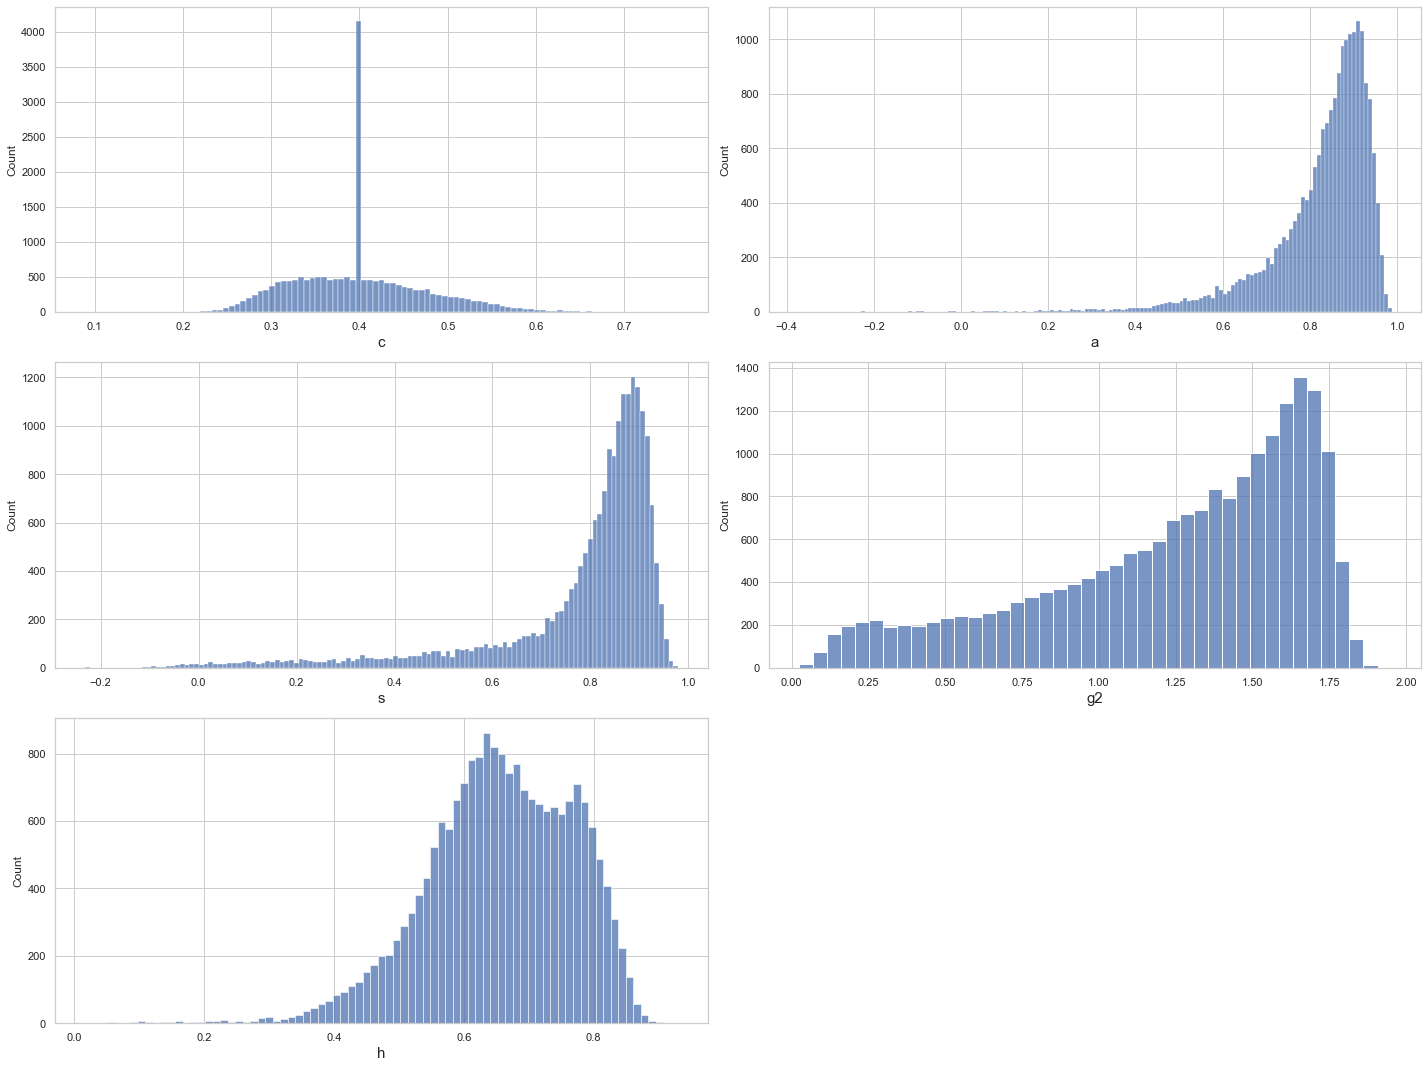

In [111]:
names = df2_new.iloc[:, :-1]
# Boxplot untuk mengetahui outlier dan distribusi data
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in names:
    if plotnumber <= 5:
        ax = plt.subplot(3, 2, plotnumber)
        sns.histplot(names[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

#### Data Preprocessing

In [115]:
sc= StandardScaler()
X_log_data = sc.fit_transform(X_log_data)
X_log_data = pd.DataFrame(data=X_log_data, columns=X_log.columns)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_log_data, y_log, test_size = 0.2, random_state = 42)

#### Pendefinisian Model

Kita gunakan default Model logistic Regression

In [122]:
logreg= LogisticRegression(random_state=42)

#### Pelatihan Model

In [123]:
logreg.fit(X_train,y_train)

LogisticRegression(random_state=42)

#### Evaluasi Model

In [124]:
logreg.score(X_train, y_train)

0.811

In [125]:
y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)

0.81125

In [126]:
confusion_matrix(y_test, y_pred)

array([[ 182,  594],
       [ 161, 3063]], dtype=int64)

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.23      0.33       776
           1       0.84      0.95      0.89      3224

    accuracy                           0.81      4000
   macro avg       0.68      0.59      0.61      4000
weighted avg       0.78      0.81      0.78      4000



#### Model inference

In [130]:
X_log_data.head()

,c,a,s,g2,h
0,-5.658046e-01,0.868891,0.387171,0.777501,0.371600
1,-1.163725e+00,-1.712044,-0.307765,0.653167,0.567629
2,1.342636e-01,0.462024,0.181952,1.132208,0.845468
3,-4.950592e-16,0.118505,0.202242,0.969821,1.032004
4,6.557568e-01,0.122014,0.116240,-0.318142,-0.394616


In [136]:
new_data = [[0.5, 0.7, 1, 1.2, 0.5]]
X_pred = pd.DataFrame(new_data, index=[1], columns=X_log_data.columns)
X_pred

,c,a,s,g2,h
1,0.5,0.7,1,1.2,0.5


In [139]:
result = logreg.predict(sc.transform(X_pred))
if(result == 1):
  print('galaksi spiral')

else :
  print('galaksi elips')

galaksi spiral


C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### Pengambilan Kesimpulan


Untuk Kasus Kalsifikasi menggunakan logistic regression karena data nya inbalance maka kita bisa lihat model evaluationnya menggunakan classification report untuk galaxy elips memiliki presisi 0.54 sedangkan untuk galaxy spiral 0.83 artinya model tidak cukup bagus untuk memprediksi data galaxy elips